In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.axisartist.axislines import SubplotZero
from sympy import solve, Poly, Eq, Function, exp, symbols
from matplotlib.patches import Arc
from matplotlib.transforms import IdentityTransform, TransformedBbox, Bbox
from typing import Sequence
import sys
sys.path.append('../')
from functions import ellipse, AngleAnnotation

Figure 4.1: Path of a molecule A with velocity v moving through a cylinder with a cross sectional area σAB

In [ ]:
# Lines defining top and bottom of the cylinder
x_fig1 = np.linspace(0, 10, 100)
yb_fig1 = np.zeros(100)
yt_fig1 = yb_fig1 + 5

# Ellipse making out front and back of the cylinder
x_ellipse = np.linspace(-1, 1, 5000)
b_fig1 = 1
a_fig1 = 2.5
x_ellipse_plot, y_ellipse = ellipse(x_ellipse, b_fig1, a_fig1) # This ellipse is also used as the inner ellipse in Figure 4.2

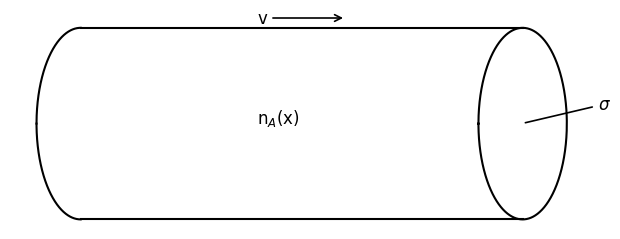

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6.3,2.5))

# Top and bottom lines of cylinder
ax.plot(x_fig1, yb_fig1, color = 'k')
ax.plot(x_fig1, yt_fig1, color = 'k')
# Number density (n_A(x)) and velocity (V)
ax.text(4, 2.5, r'n$_{A}$(x)', fontsize = 12)
ax.annotate('v', xy = (6, 5.25), xytext = (4, 5.25),  arrowprops=({'arrowstyle': '->', 'lw': 1.2, 
            'facecolor':'k'}), va = 'center', fontsize = 12)
# Front of cylinder with cross sectional area \sigma
ax.plot(x_ellipse_plot+10, y_ellipse+2.493, color = 'k')
ax.annotate(r'$\sigma$', xy = (10, 2.5), xytext = (11.7, 3), arrowprops=({'arrowstyle': '-', 'lw': 1.2, 
            'facecolor':'k'}), va = 'center', fontsize = 12)
# Back of cylinder
ax.plot(x_ellipse_plot[:2500], y_ellipse[:2500]+2.494, color = 'k')
ax.plot(x_ellipse_plot[7500:], y_ellipse[7500:]+2.493, color = 'k')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.savefig('cylinder.png', dpi = 150)
plt.show()

Figure 4.2: Scattering of a molecule with impact parameter in the range b to b+db into angle θ to θ + dθ

In [ ]:
# Outer ellipse
x_out_el = np.linspace(-1.5, 1.5, 5000)
b_out = 1.5
a_out = 3
x_outer_ellipse, y_outer_ellipse = ellipse(x_out_el, b_out, a_out)

# x-axis
x_axis = np.linspace(-1, 21, 100)
y_zeros = np.zeros(100)

# Height of inner ellipse
x_b = y_zeros
y_b = np.linspace(0, 2.5, 100)

# Line starting in B going up following the angle \theta
x_B = np.linspace(11.5, 20)
y_B = 0.5*x_B-5.75

In [ ]:
# Trajectories
x = np.linspace(0, 20, 1000)
def draw_42(x):
    y = np.ones_like(x)*2.5
    y[550:] += np.log(np.cosh(np.linspace(0, 4.5, 450)))
    y -= 2*norm.pdf(x, x[550], 1)
    return y
y_draw = draw_42(x)

# Line starting in B going up meeting the trajectory
x_R = np.linspace(x[550], 11.5, 100)
y_R = np.linspace(y_draw[550], 0, 100)

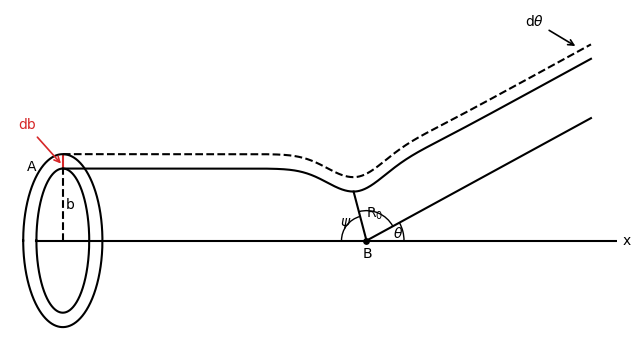

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6.5, 3.5))

# x-axis
ax.plot(x_axis, y_zeros, color = 'k')
ax.text(21.2, -0.15, 'x')
#height of inner ellipse
ax.plot(x_b, y_b, color = 'k', ls = '--')
ax.text(0.1, 1.1, 'b')

# Trajectories
ax.plot(x, y_draw, color = 'k')
ax.plot(x, y_draw+0.5, color = 'k', ls = '--')
ax.annotate(r'd$\theta$', xy = (19.5, 6.7), xytext = (17.5, 7.6), arrowprops=({'arrowstyle': '->', 'lw': 1.2, 
            'facecolor':'k'}), va = 'center')

# Line starting in B going up following the angle \theta
ax.plot(x_B, y_B, color = 'k')
# Line starting in B going up meeting the trajectory
ax.plot(x_R, y_R, color = 'k')

# Inner ellipse
ax.plot(x_ellipse_plot, y_ellipse, color = 'k')
# Outer ellipse
ax.plot(x_outer_ellipse, y_outer_ellipse, color = 'k')
# A particles
ax.text(-1.35, 2.4, 'A')

# Angles \psi, R_0, and \theta
center = (11.5, 0)
am1 = AngleAnnotation(center, (x_R[0], y_R[0]), (x_axis[0], y_zeros[0]), ax = ax, size = 50)
ax.text(10.5, 0.5, r'$\psi$')
am2 = AngleAnnotation(center, (x_B[-1], y_B[-1]), (x_R[0], y_R[0]), ax = ax, size = 60)
ax.text(11.5, 0.8, r'R$_{0}$')
am3 = AngleAnnotation(center, (x_axis[-1], y_zeros[-1]), (x_B[-1], y_B[-1]), ax = ax, size = 75)
ax.text(12.5, 0.1, r'$\theta$')

# B particles
ax.scatter(11.5, 0, color = 'k', s = 15)
ax.text(11.35, -0.6, 'B')
# Impact parameter range b;b+db
ax.scatter(0, 2.76, color = 'tab:red', marker = '|', s = 100)
ax.annotate('db', xy = (0,2.6), xytext = (-1.7, 4), arrowprops=({'arrowstyle': '->', 'lw': 1.2, 'color': 'tab:red'}), 
            va = 'center', color = 'tab:red')

ax.set_ylim(-3.1, 8)
ax.set_xlim(-2, 21)

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.savefig('imp_par.png', dpi = 150)
plt.show()